In [1]:
require(mvtnorm)
require(MASS)

Loading required package: mvtnorm
Loading required package: MASS


For integrating R with notebook: https://www.datacamp.com/community/blog/jupyter-notebook-r

In [19]:
#Set up the structure of our bivariate distribution
nsamples=1000
rho=.8
mux = muy = 0
sigx = 1
sigy = .5
#Variance/covariance matrix
sigma = matrix(c(sigx^2, rho*sigx*sigy, rho*sigy*sigx, sigy^2), nrow=2)
sigma

1.0,0.40
0.4,0.25


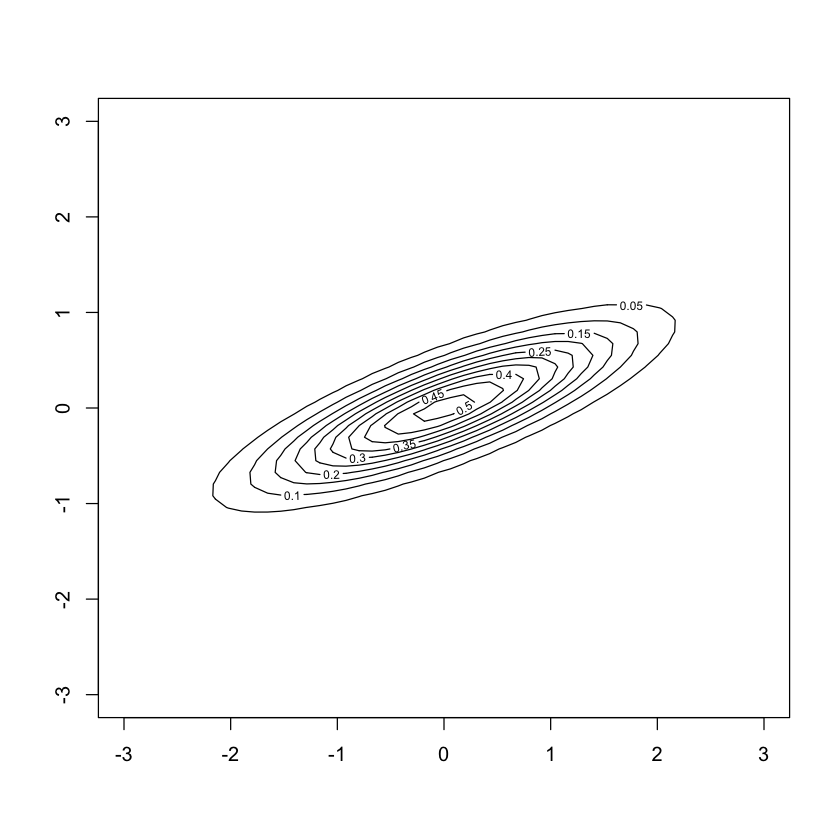

In [20]:
#Draw contour plot of known distribution
fiftyticks = seq(from=-3, to=3, length.out=50)
#This is just repeating the values in different ways. Y is the entire vector repeated 50 times
#X is each item repeated 50 times in a row and then moves to the next item
y=rep(fiftyticks,50)
x=rep(fiftyticks,each=50)

z=matrix(dmvnorm(cbind(y,x),c(mux,muy),sigma),50,50)
contour(list(x=fiftyticks,y=fiftyticks,z=z),
       ylim=c(-3,3),xlim=c(-3,3),drawlabels=TRUE)

We can see that there is more variance across the x-axis than the y-axis.
We can also see the correlation between x and y here.

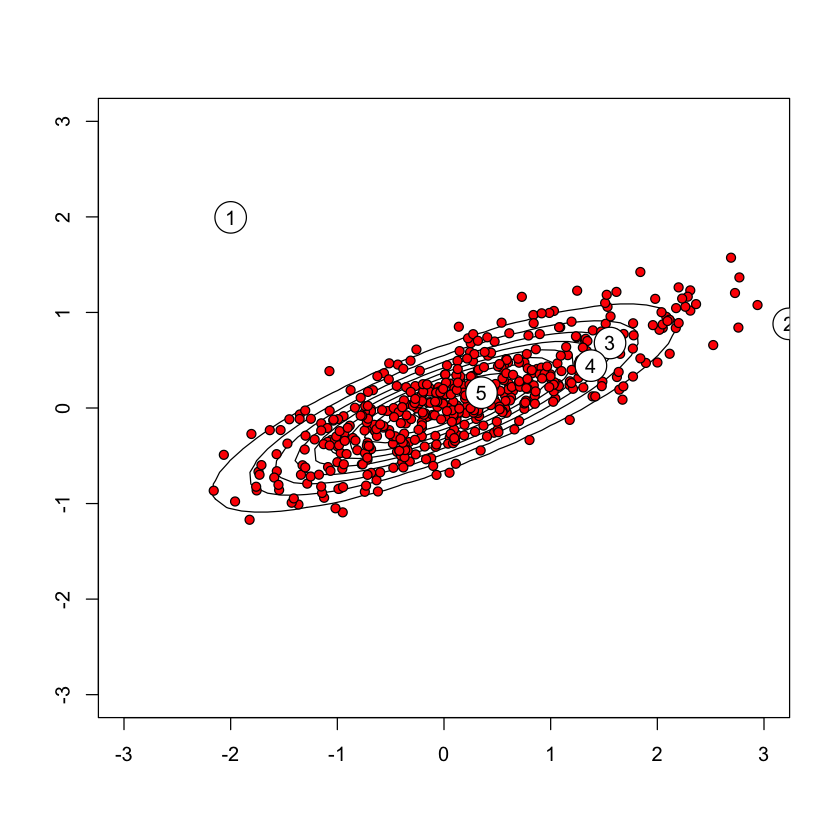

In [30]:
#Draw contour plot of known distribution
fiftyticks = seq(from=-3, to=3, length.out=50)
#This is just repeating the values in different ways. Y is the entire vector repeated 50 times
#X is each item repeated 50 times in a row and then moves to the next item
y=rep(fiftyticks,50)
x=rep(fiftyticks,each=50)

z=matrix(dmvnorm(cbind(y,x),c(mux,muy),sigma),50,50)
contour(list(x=fiftyticks,y=fiftyticks,z=z),
       ylim=c(-3,3),xlim=c(-3,3),drawlabels=FALSE)

####Now do the gibbs sampling
#Initialize some params for speed
sxt1mr=sqrt(sigx^2*(1-rho^2))
syt1mr=sqrt(sigy^2*(1-rho^2))
rxy=rho*(sigx/sigy)
ryx=rho*(sigy/sigx)

xsamp=ysamp=rep(0,nsamples)

#Starting values for the MCMC chain
xsamp[1] = -2
ysamp[1] = 2 

for (i in c(1:(nsamples-1))){
    xsamp[i+1]=rnorm(1,mean=rxy*ysamp[i],
                    sd=sxt1mr)
    ysamp[i+1]=rnorm(1,mean=ryx*xsamp[i+1], sd=syt1mr)
}

#Plot the last 500 points (consider first 500 as burn in)
points(xsamp[-c(1:500)],ysamp[-c(1:500)],pch=21,bg="red")

for (j in c(1:5)){
    points(xsamp[j],ysamp[j]-.005,pch=21,cex=3.5,bg="white")
    text(xsamp[j],ysamp[j],as.character(j))
}

rnorm - grab one random number from a normal distribution that has a mean of ryx*xsamp[i+1] and a sd we specified.

rxy = rho (*correlation*) * (devX/devY)
ryx = rho * (devY/devX)

__Notice__ points 1 and 2 are pretty much flipped along a diagnol. That is because the next y value is derived from the previous x and the next x is derived from the previous y.

We continue to work down that diagnol and captures the correlation between the two variables.

__Notice also__ that the points look just like our true distribution because of this.

In [28]:
cor.test(xsamp,ysamp)


	Pearson's product-moment correlation

data:  xsamp and ysamp
t = 39.275, df = 998, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7536182 0.8024383
sample estimates:
      cor 
0.7792074 


In [29]:
sd(xsamp)
sd(ysamp)

[1] 1.005876

[1] 0.4943551

These are close to the true values we set earlier

__More Notes__
Gibbs sampling can be used:
    1) We know the conditional distribution of single variables
    2) There are more than one variables
    
Gibbs sampling is deterministic - we don't do a proposal check like in Metropolis-Hastings
    -Though this isn't 100% true, it just basically accepts everything with a probability of 1... whatever
    
Gibbs sampling is great because it can handle large multivariate spaces...

__Enter JAGS__

## JAGS

__Now things get weird__
We are going to have R scrips and JAGS models

- JAGS doesnt work like a linear flow.  It is a set of directives for "tempo" sure wtf

The first thing that we are going to do is estimate parameters of a normal distribution